In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
sns.set()

In [122]:
# Load the dataset
df = pd.read_csv('../data/join_02.csv')

In [123]:
# date format preparation
df['date'] = pd.to_datetime(df['date'])
df['release_date'] = pd.to_datetime(df['release_date'])

In [124]:
df.columns

Index(['gamename', 'year', 'month', 'avg', 'gain', 'peak', 'avg_peak_perc',
       'date', 'release_date', 'required_age', 'price', 'dlc_count', 'windows',
       'mac', 'linux', 'metacritic_score', 'positive', 'negative',
       'developers', 'publishers', 'average_playtime_forever',
       'average_playtime_two_weeks', 'median_playtime_forever',
       'median_playtime_two_weeks', 'multi_player', 'pvp', 'co-op',
       'genre_action', 'genre_adventure', 'genre_casual',
       'genre_sexual_content', 'genre_strategy', 'genre_sports',
       'genre_racing', 'genre_rpg', 'genre_simulation', 'indie', 'full_audio',
       'full_controller_support', 'age_0_plus', 'age_13_plus', 'age_18_plus'],
      dtype='object')

In [232]:
df.sort_values(by=['gain']).gain

11535   -250248.99
19830   -132161.46
33997    -99716.06
23425    -99352.39
15670    -98787.12
           ...    
63570          NaN
63652          NaN
63708          NaN
63772          NaN
63853          NaN
Name: gain, Length: 63854, dtype: float64

In [231]:
df.sort_values(by=['gain'])

,gamename,year,month,avg,gain,peak,avg_peak_perc,date,release_date,required_age,...,genre_sports,genre_racing,genre_rpg,genre_simulation,indie,full_audio,full_controller_support,age_0_plus,age_13_plus,age_18_plus
11535,Cyberpunk 2077,2021,January,82146.66,-250248.99,225670,36.4012%,2021-01-01,2020-12-09,17,...,0,0,1,0,0,1,0,0,1,0
19830,Fallout 4,2015,December,94136.37,-132161.46,201635,46.6865%,2015-12-01,2015-11-09,17,...,0,0,1,0,0,1,1,0,1,0
33997,Monster Hunter: World,2018,September,88575.17,-99716.06,227644,38.9095%,2018-09-01,2018-08-09,0,...,0,0,0,0,0,1,0,1,0,0
23425,Grand Theft Auto V,2015,May,93361.62,-99352.39,215966,43.2298%,2015-05-01,2015-04-13,17,...,0,0,0,0,0,1,1,0,1,0
15670,Dota 2,2015,September,508156.85,-98787.12,888728,57.178%,2015-09-01,2013-07-09,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63570,Zup! 3,2017,January,91.49,NaN,687,13.3173%,2017-01-01,2017-01-12,0,...,0,0,0,0,1,1,0,1,0,0
63652,ibb & obb,2014,May,16.25,NaN,186,8.7366%,2014-05-01,2014-05-26,0,...,0,0,0,0,1,0,1,1,0,0
63708,klocki,2016,July,38.36,NaN,121,31.7025%,2016-07-01,2016-07-13,0,...,0,0,0,0,1,1,0,1,0,0
63772,rFactor 2,2015,November,112.81,NaN,313,36.0415%,2015-11-01,2015-11-12,0,...,1,1,0,1,0,0,0,1,0,0


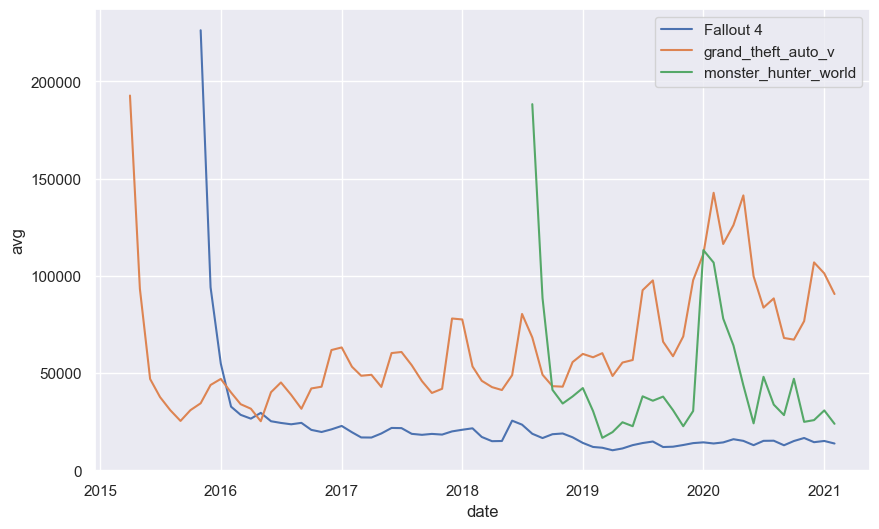

In [234]:
fallout4 = df[df['gamename']=='Fallout 4']
grand_theft_auto_v = df[df['gamename']=='Grand Theft Auto V']
monster_hunter_world = df[df['gamename']=='Monster Hunter: World']

ax = plt.figure(figsize=(10, 6))
ax = sns.lineplot(x="date", y="avg", data=fallout4, label='Fallout 4') 
ax = sns.lineplot(x="date", y="avg", data=grand_theft_auto_v, label='grand_theft_auto_v') 
ax = sns.lineplot(x="date", y="avg", data=monster_hunter_world, label='monster_hunter_world') 

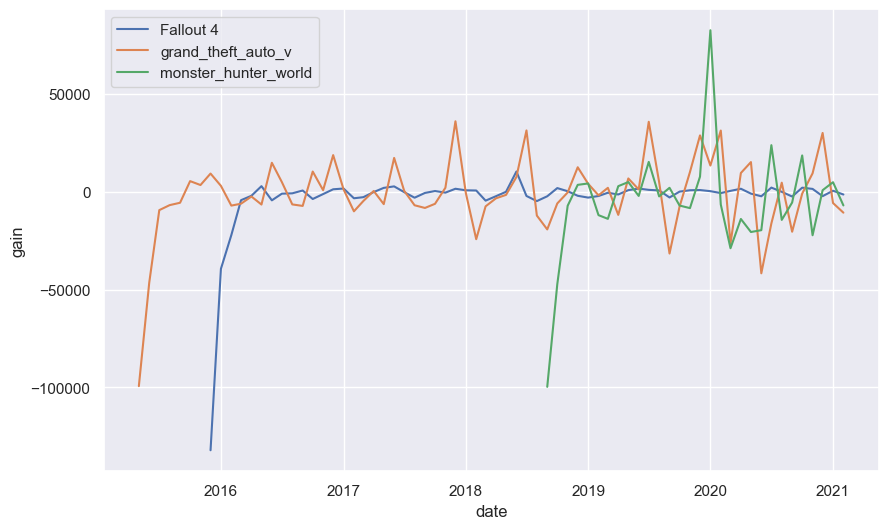

In [227]:
fallout4 = df[df['gamename']=='Fallout 4']
grand_theft_auto_v = df[df['gamename']=='Grand Theft Auto V']
monster_hunter_world = df[df['gamename']=='Monster Hunter: World']

ax = plt.figure(figsize=(10, 6))
ax = sns.lineplot(x="date", y="gain", data=fallout4, label='Fallout 4') 
ax = sns.lineplot(x="date", y="gain", data=grand_theft_auto_v, label='grand_theft_auto_v') 
ax = sns.lineplot(x="date", y="gain", data=monster_hunter_world, label='monster_hunter_world') 

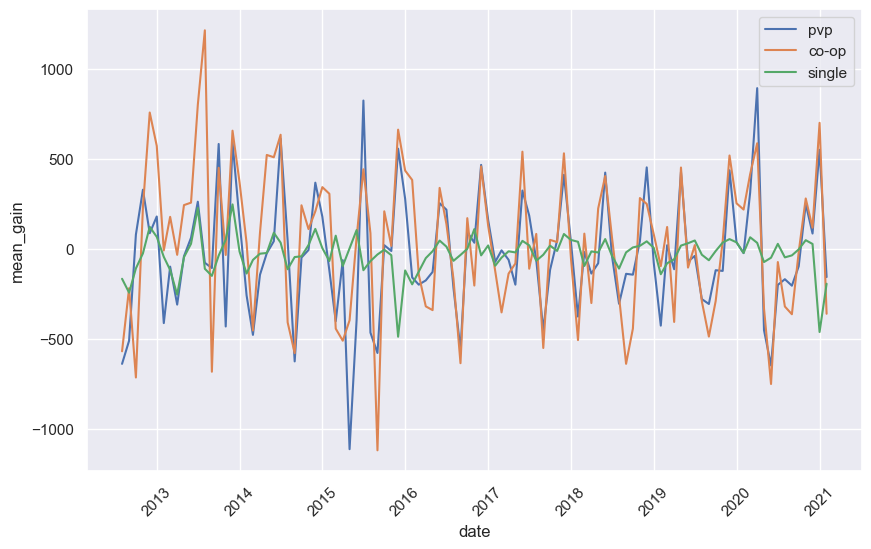

In [215]:
pvp = df[df['pvp']==1]
pvp = pvp.groupby(['date']).agg(mean_gain=('gain', 'mean')) 
co_op = df[df['co-op']==1]
co_op = co_op.groupby(['date']).agg(mean_gain=('gain', 'mean')) 
single = df[df['multi_player']==0]
single = single.groupby(['date']).agg(mean_gain=('gain', 'mean')) 

ax = plt.figure(figsize=(10, 6))
ax = sns.lineplot(x="date", y="mean_gain", data=pvp, label='pvp') 
ax = sns.lineplot(x="date", y="mean_gain", data=co_op, label='co-op') 
ax = sns.lineplot(x="date", y="mean_gain", data=single, label='single') 

plt.xticks(rotation=45)
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

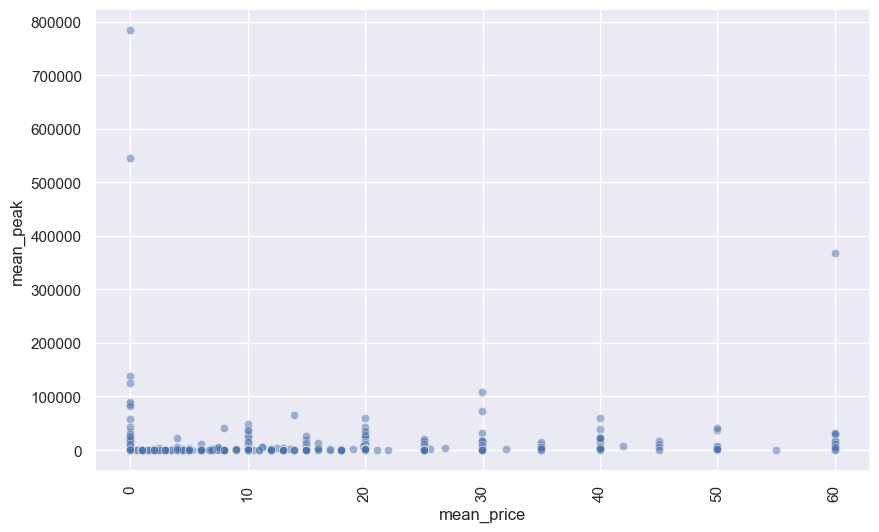

In [211]:
data = df.groupby(['gamename']).agg(mean_peak=("peak", 'mean'), mean_price=('price', 'mean')) 
data = data.reset_index() 

ax = plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
ax = sns.scatterplot(x="mean_price", y="mean_peak", data=data, alpha=0.5) 

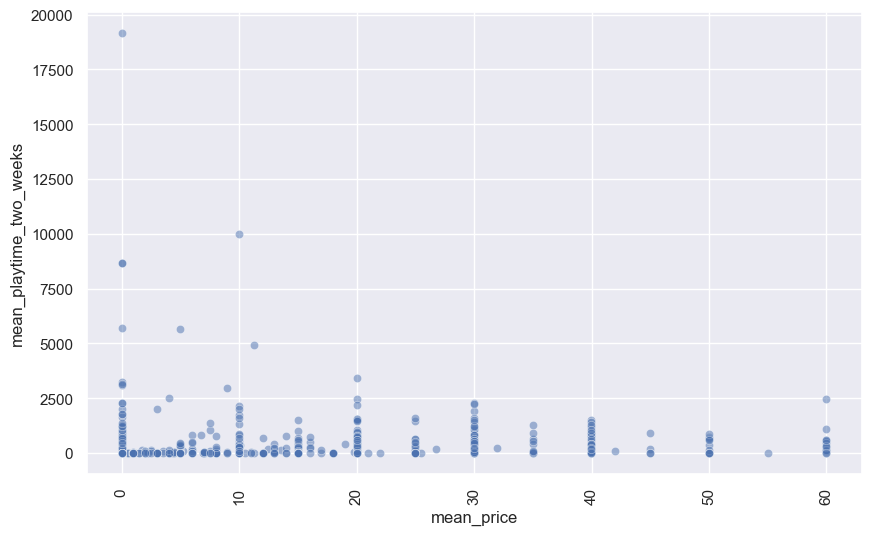

In [210]:
data = df.groupby(['gamename']).agg(mean_playtime_two_weeks=("average_playtime_two_weeks", 'mean'), mean_price=('price', 'mean')) 
data = data.reset_index() 

ax = plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
ax = sns.scatterplot(x="mean_price", y="mean_playtime_two_weeks", data=data, alpha=0.5) 

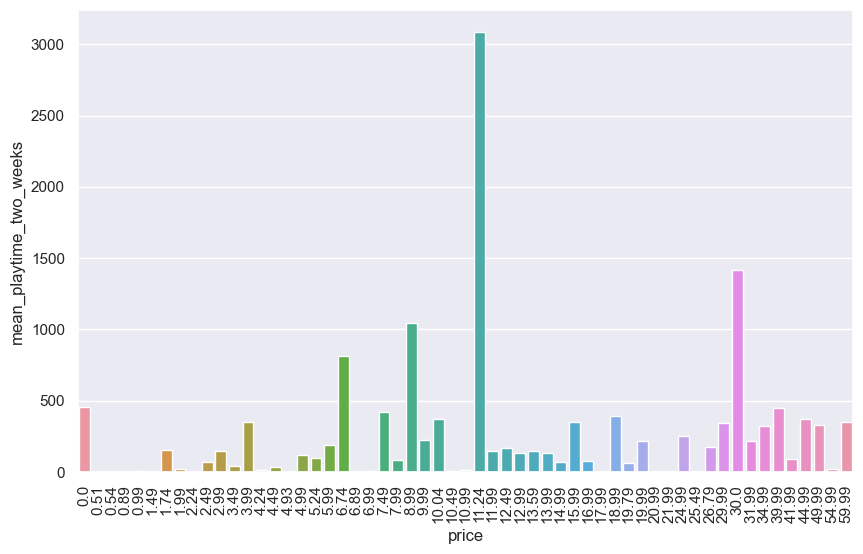

In [200]:
data = df.groupby(['price']).agg(mean_playtime_two_weeks=("average_playtime_two_weeks", 'mean')) 
data = data.reset_index() 

ax = plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
ax = sns.barplot(x="price", y="mean_playtime_two_weeks", data=data) 

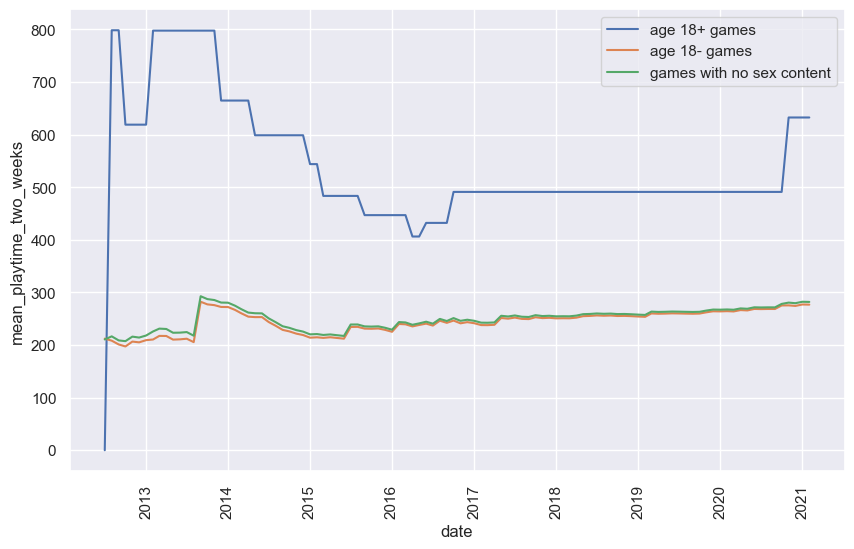

In [198]:
age_18_plus = df[df['age_18_plus']==1]
age_18_plus = age_18_plus.groupby(['date']).agg(mean_playtime_two_weeks=("average_playtime_two_weeks", 'mean')) 
age_18_below = df[df['age_18_plus']==0]
age_18_below = age_18_below.groupby(['date']).agg(mean_playtime_two_weeks=("average_playtime_two_weeks", 'mean')) 
no_sex_content = df[df['genre_sexual_content']==0]
no_sex_content = no_sex_content.groupby(['date']).agg(mean_playtime_two_weeks=("average_playtime_two_weeks", 'mean')) 

# plot barplot 
ax = plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
ax = sns.lineplot(x="date", y="mean_playtime_two_weeks", data=age_18_plus, label='age 18+ games') 
ax = sns.lineplot(x="date", y="mean_playtime_two_weeks", data=age_18_below, label='age 18- games') 
ax = sns.lineplot(x="date", y="mean_playtime_two_weeks", data=no_sex_content, label='games with no sex content') 

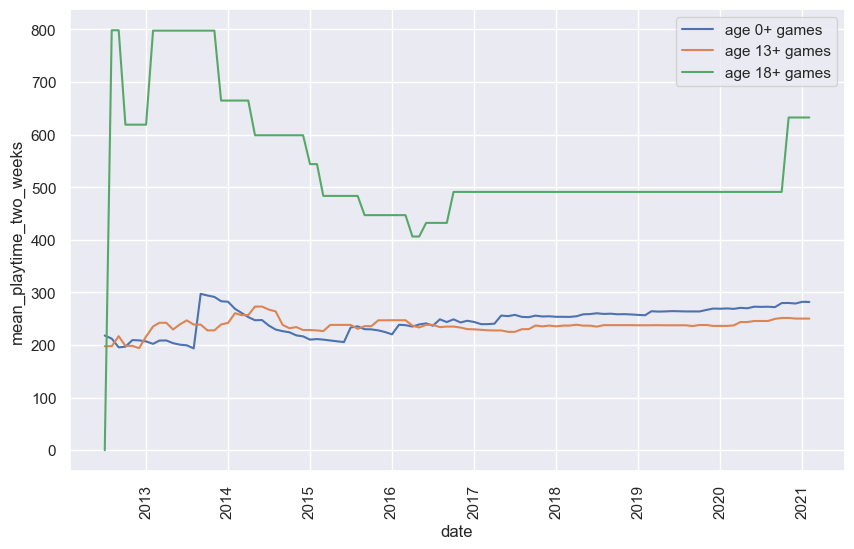

In [194]:
age_0_plus = df[df['age_0_plus']==1]
age_0_plus = age_0_plus.groupby(['date']).agg(mean_playtime_two_weeks=("average_playtime_two_weeks", 'mean')) 
age_13_plus = df[df['age_13_plus']==1]
age_13_plus = age_13_plus.groupby(['date']).agg(mean_playtime_two_weeks=("average_playtime_two_weeks", 'mean')) 
age_18_plus = df[df['age_18_plus']==1]
age_18_plus = age_18_plus.groupby(['date']).agg(mean_playtime_two_weeks=("average_playtime_two_weeks", 'mean')) 

# plot barplot 
ax = plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
ax = sns.lineplot(x="date", y="mean_playtime_two_weeks", data=age_0_plus, label='age 0+ games') 
ax = sns.lineplot(x="date", y="mean_playtime_two_weeks", data=age_13_plus, label='age 13+ games') 
ax = sns.lineplot(x="date", y="mean_playtime_two_weeks", data=age_18_plus, label='age 18+ games') 

(13879.0, 19692.0)

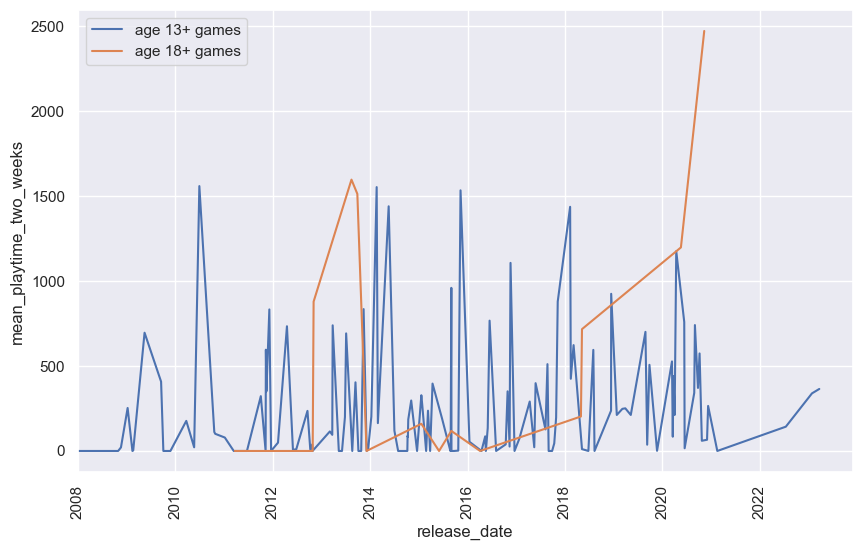

In [184]:
age_13_plus = df[df['age_13_plus']==1]
age_13_plus = age_13_plus.groupby(['release_date']).agg(mean_playtime_two_weeks=("average_playtime_two_weeks", 'mean')) 
age_18_plus = df[df['age_18_plus']==1]
age_18_plus = age_18_plus.groupby(['release_date']).agg(mean_playtime_two_weeks=("average_playtime_two_weeks", 'mean')) 

# plot barplot 
ax = plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
ax = sns.lineplot(x="release_date", y="mean_playtime_two_weeks", data=age_13_plus, label='age 13+ games') 
ax = sns.lineplot(x="release_date", y="mean_playtime_two_weeks", data=age_18_plus, label='age 18+ games') 
ax.set_xlim([datetime.date(2008, 1, 1), datetime.date(2023, 12, 1)])

(13879.0, 19692.0)

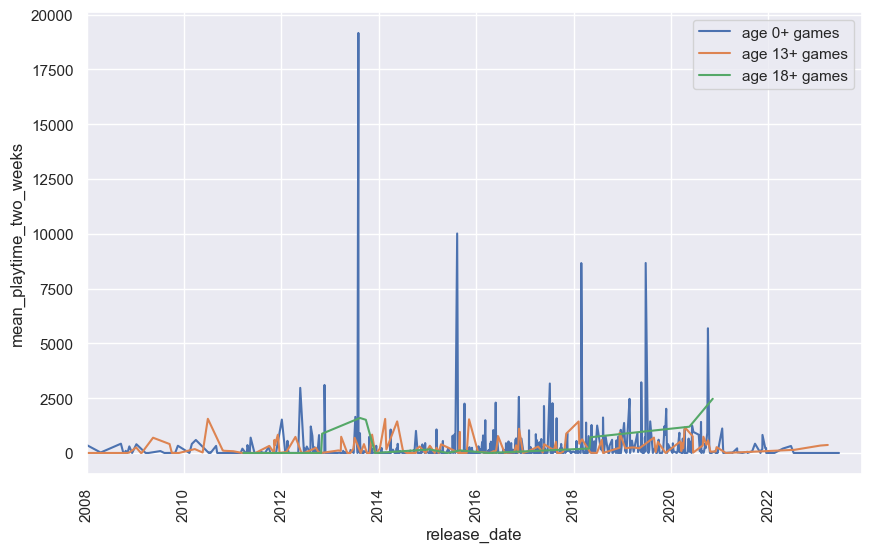

In [183]:
age_0_plus = df[df['age_0_plus']==1]
age_0_plus = age_0_plus.groupby(['release_date']).agg(mean_playtime_two_weeks=("average_playtime_two_weeks", 'mean')) 
age_13_plus = df[df['age_13_plus']==1]
age_13_plus = age_13_plus.groupby(['release_date']).agg(mean_playtime_two_weeks=("average_playtime_two_weeks", 'mean')) 
age_18_plus = df[df['age_18_plus']==1]
age_18_plus = age_18_plus.groupby(['release_date']).agg(mean_playtime_two_weeks=("average_playtime_two_weeks", 'mean')) 

# plot barplot 
ax = plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
ax = sns.lineplot(x="release_date", y="mean_playtime_two_weeks", data=age_0_plus, label='age 0+ games') 
ax = sns.lineplot(x="release_date", y="mean_playtime_two_weeks", data=age_13_plus, label='age 13+ games') 
ax = sns.lineplot(x="release_date", y="mean_playtime_two_weeks", data=age_18_plus, label='age 18+ games') 
ax.set_xlim([datetime.date(2008, 1, 1), datetime.date(2023, 12, 1)])

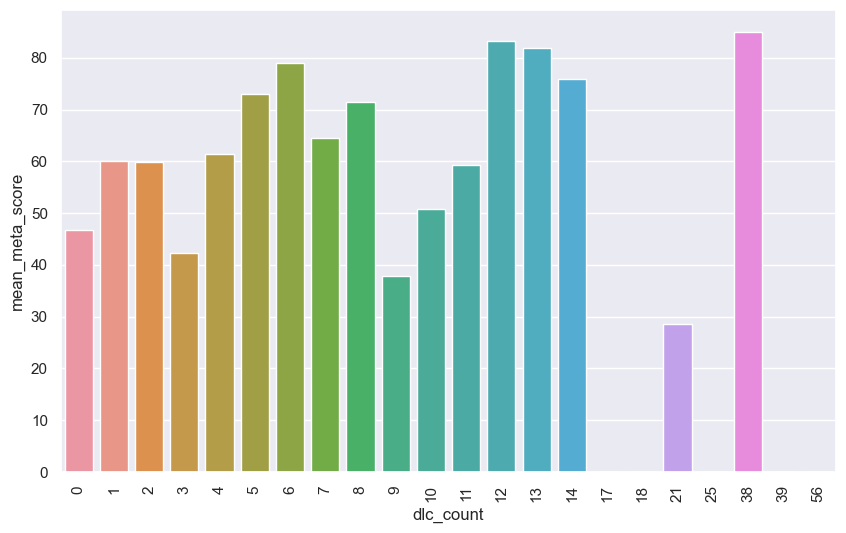

In [157]:
data = df[(df['dlc_count']<150) & (df['multi_player']==0)]
data = data.groupby(['dlc_count']).agg(mean_meta_score=("metacritic_score", 'mean')) 
data = data.reset_index() 

# plot barplot 
ax = plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
ax = sns.barplot(x="dlc_count", y="mean_meta_score", data=data) 

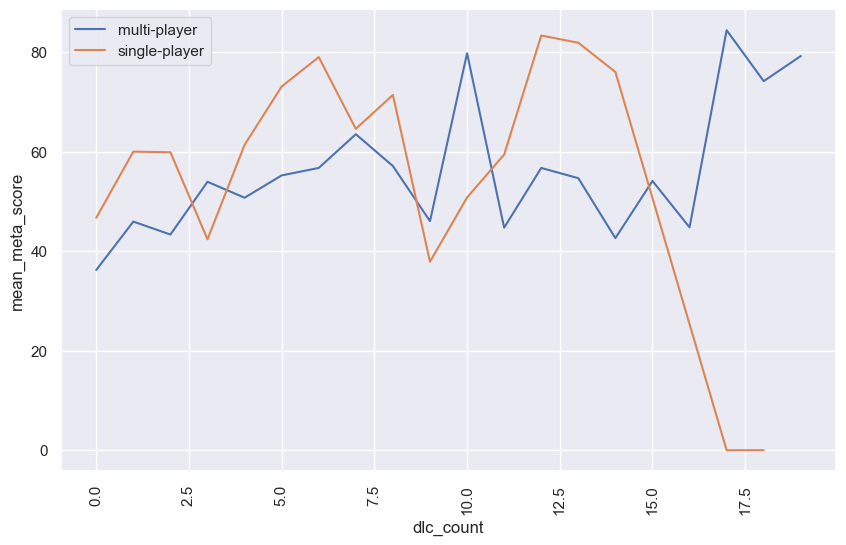

In [158]:
multi = df[(df['multi_player']==1) & (df['dlc_count']<20)]
multi = multi.groupby(['dlc_count']).agg(mean_meta_score=("metacritic_score", 'mean')) 
single = df[(df['multi_player']==0) & (df['dlc_count']<20)]
single = single.groupby(['dlc_count']).agg(mean_meta_score=("metacritic_score", 'mean')) 


# plot barplot 
ax = plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
ax = sns.lineplot(x="dlc_count", y="mean_meta_score", data=multi, label='multi-player') 
ax = sns.lineplot(x="dlc_count", y="mean_meta_score", data=single, label='single-player') 

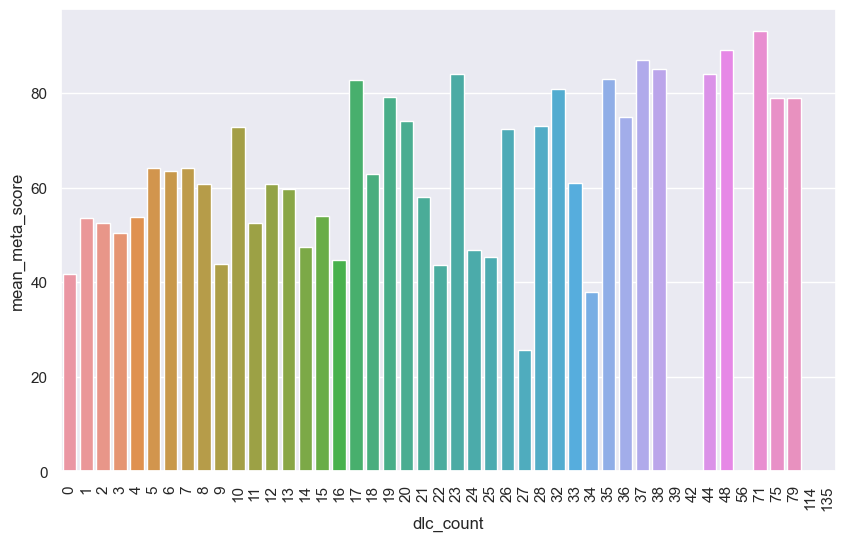

In [133]:
data = df[df['dlc_count']<150]
data = data.groupby(['dlc_count']).agg(mean_meta_score=("metacritic_score", 'mean')) 
data = data.reset_index() 

# plot barplot 
ax = plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
ax = sns.barplot(x="dlc_count", y="mean_meta_score", data=data) 

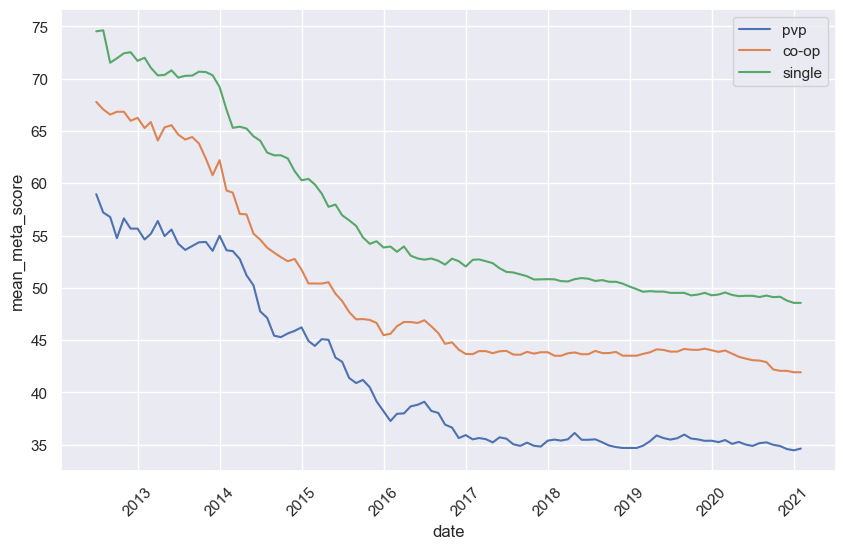

In [159]:
pvp = df[df['pvp']==1]
pvp = pvp.groupby(['date']).agg(mean_meta_score=('metacritic_score', 'mean')) 
co_op = df[df['co-op']==1]
co_op = co_op.groupby(['date']).agg(mean_meta_score=('metacritic_score', 'mean')) 
single = df[df['multi_player']==0]
single = single.groupby(['date']).agg(mean_meta_score=('metacritic_score', 'mean')) 

ax = plt.figure(figsize=(10, 6))
ax = sns.lineplot(x="date", y="mean_meta_score", data=pvp, label='pvp') 
ax = sns.lineplot(x="date", y="mean_meta_score", data=co_op, label='co-op') 
ax = sns.lineplot(x="date", y="mean_meta_score", data=single, label='single') 

plt.xticks(rotation=45)
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

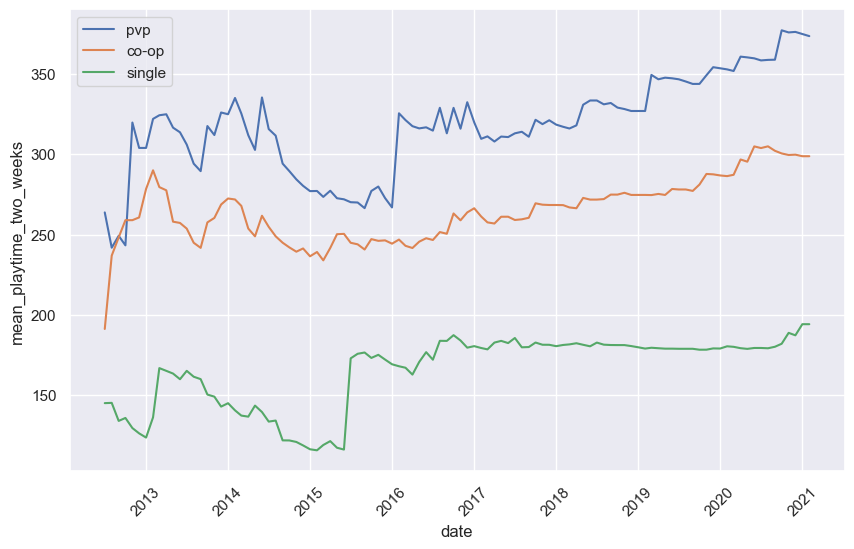

In [131]:
pvp = df[df['pvp']==1]
pvp = pvp.groupby(['date']).agg(mean_playtime_two_weeks=('average_playtime_two_weeks', 'mean')) 
co_op = df[df['co-op']==1]
co_op = co_op.groupby(['date']).agg(mean_playtime_two_weeks=('average_playtime_two_weeks', 'mean')) 
single = df[df['multi_player']==0]
single = single.groupby(['date']).agg(mean_playtime_two_weeks=('average_playtime_two_weeks', 'mean')) 

ax = plt.figure(figsize=(10, 6))
ax = sns.lineplot(x="date", y="mean_playtime_two_weeks", data=pvp, label='pvp') 
ax = sns.lineplot(x="date", y="mean_playtime_two_weeks", data=co_op, label='co-op') 
ax = sns.lineplot(x="date", y="mean_playtime_two_weeks", data=single, label='single') 

plt.xticks(rotation=45)
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

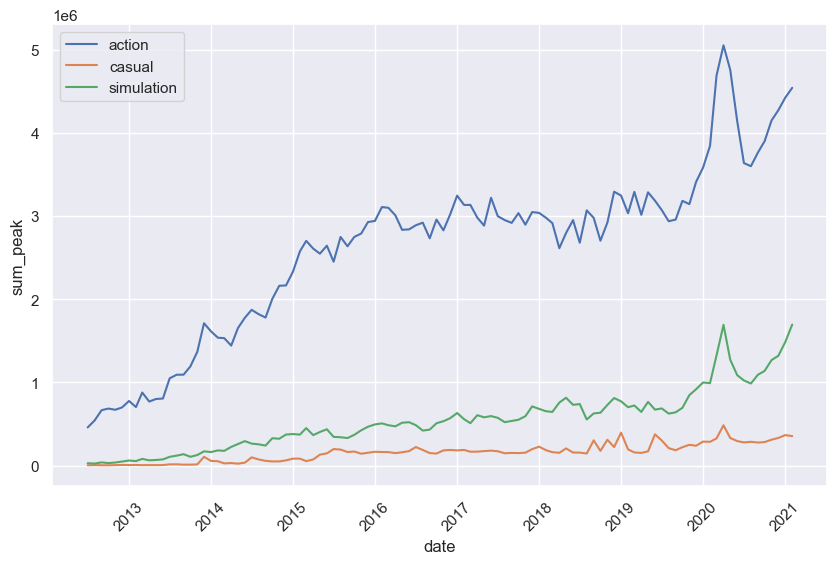

In [125]:
action = df[df['genre_action']==1]
action = action.groupby(['date']).agg(sum_peak=('peak', 'sum')) 
casual = df[df['genre_casual']==1]
casual = casual.groupby(['date']).agg(sum_peak=('peak', 'sum')) 
simulation = df[df['genre_simulation']==1]
simulation = simulation.groupby(['date']).agg(sum_peak=('peak', 'sum')) 

ax = plt.figure(figsize=(10, 6))

ax = sns.lineplot(x="date", y="sum_peak", data=action, label='action') 
ax = sns.lineplot(x="date", y="sum_peak", data=casual, label='casual') 
ax = sns.lineplot(x="date", y="sum_peak", data=simulation, label='simulation') 

plt.xticks(rotation=45)
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

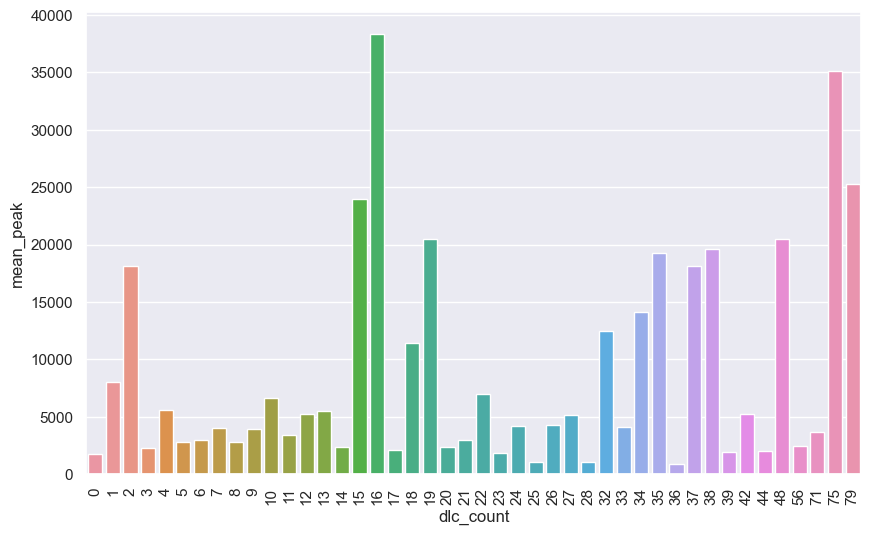

In [126]:
data = df[df['dlc_count']<100]
data = data.groupby(['dlc_count']).agg(mean_peak=("peak", 'mean')) 
data = data.reset_index() 

# plot barplot 
ax = plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
ax = sns.barplot(x="dlc_count", 
           y="mean_peak", 
           data=data) 

Text(0, 0.5, 'Average Players')

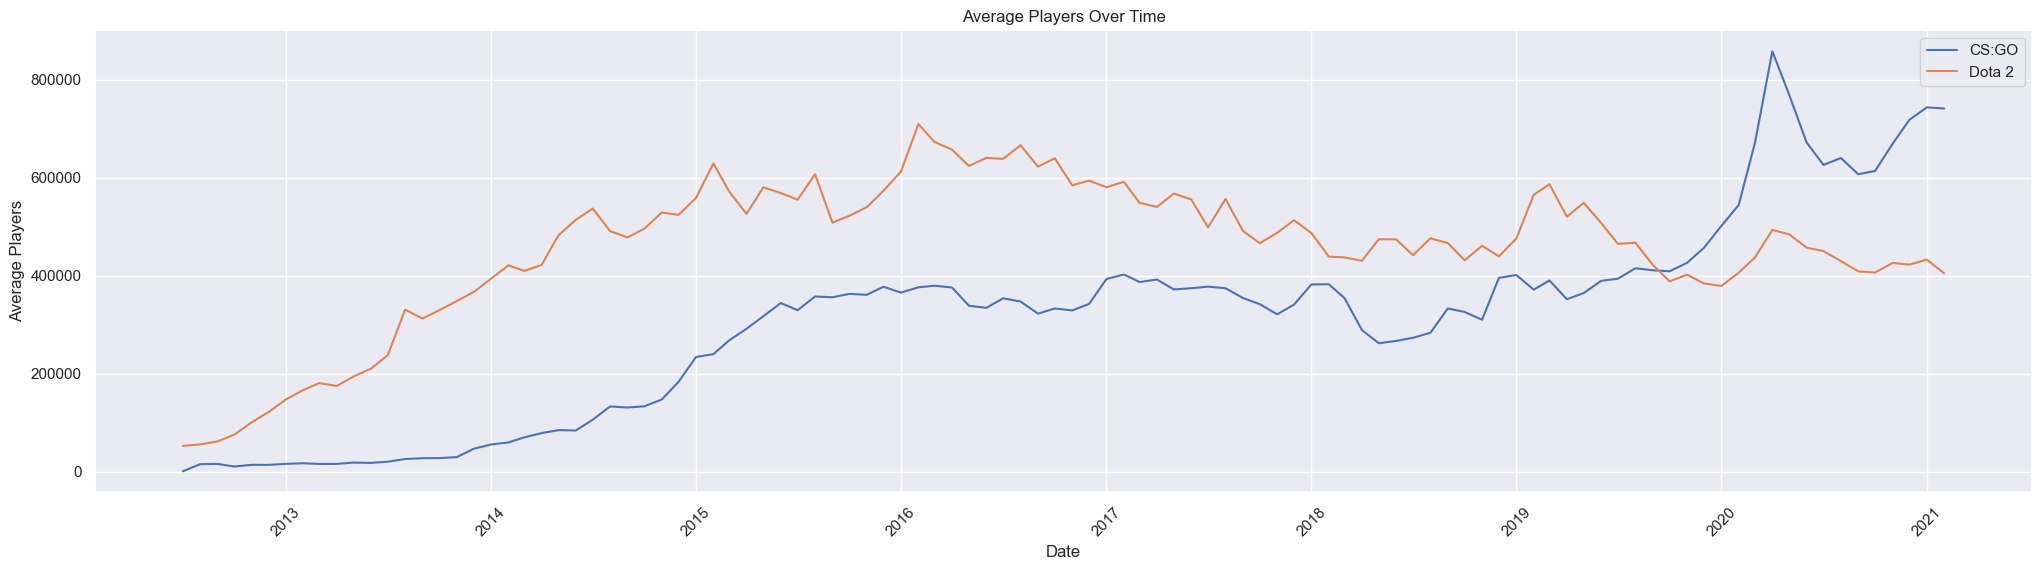

In [127]:
# data
cs_go = df[df['gamename'] == "Counter-Strike: Global Offensive"]
dota2 = df[df['gamename'] == "Dota 2"]

# axes
ax = plt.figure(figsize=(25, 6))
ax = sns.lineplot(data=cs_go, x='date', y='avg', label='CS:GO')
ax = sns.lineplot(data=dota2, x='date', y='avg', label='Dota 2')

# plot
plt.xticks(rotation=45)
plt.title('Average Players Over Time')
plt.xlabel('Date')
plt.ylabel('Average Players')

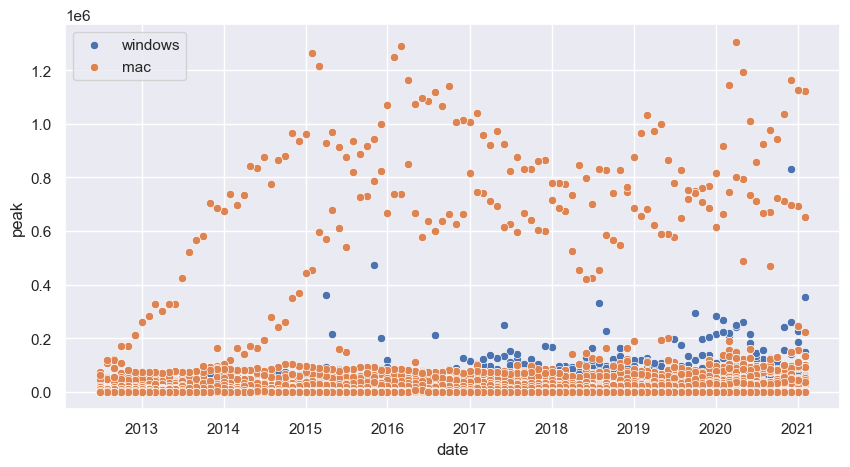

In [128]:
win_games = df[df['windows']==1]
mac_games = df[df['mac']==1]
ax = plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data=win_games, x='date', y='peak', label='windows')
ax = sns.scatterplot(data=mac_games, x='date', y='peak', label='mac')

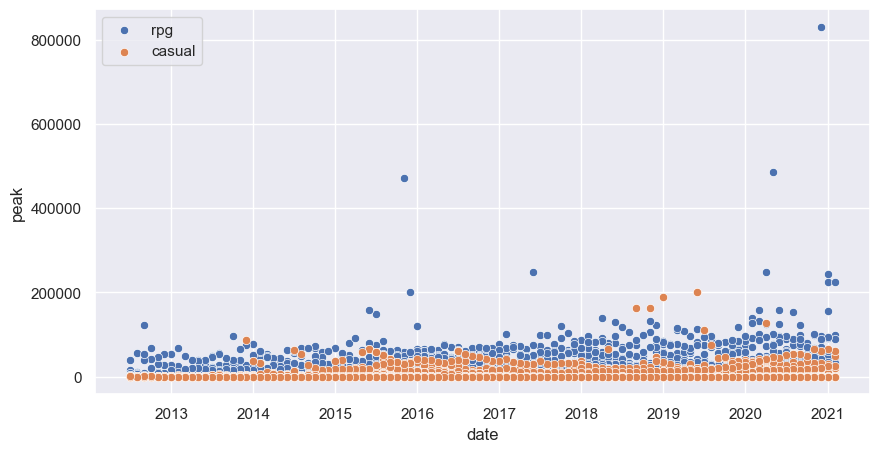

In [129]:
action = df[df['genre_action'] == 1]
rpg = df[df['genre_rpg'] == 1]
casual = df[df['genre_casual'] == 1]

ax = plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data=rpg, x='date', y='peak', label='rpg')
ax = sns.scatterplot(data=casual, x='date', y='peak', label='casual')

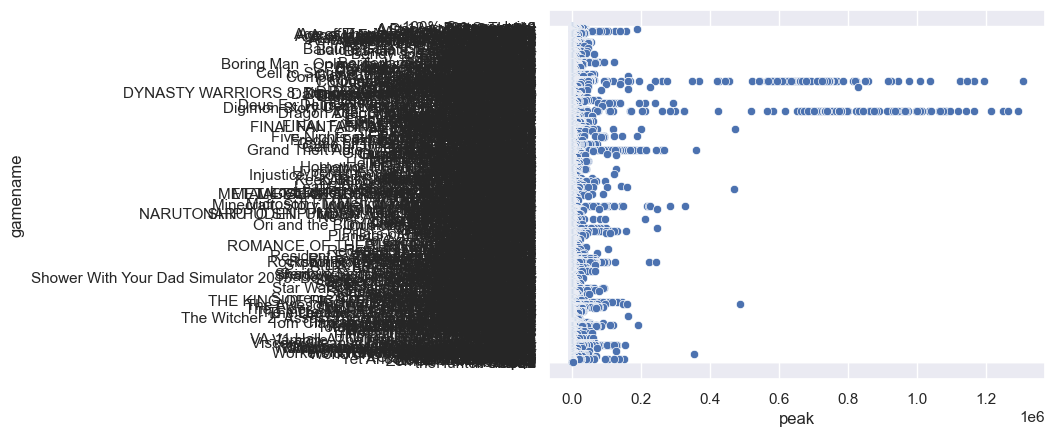

In [130]:
action = df[df['genre_action'] == 1]
ax = sns.scatterplot(df, x='peak', y='gamename')